In [ ]:
P = 1048573

import numpy as np

import pandas as pd

import statistics

from sklearn.utils import murmurhash3_32

import matplotlib.pyplot as plt

import sys

import heapq

In [ ]:
def murmur(input_string,i,mod):

  ind = np.mod(murmurhash3_32(key = input_string, positive = True, seed=42+i), mod)

  return ind

In [ ]:
class min_sketch():

  def __init__(self, m, k):

    self.m = m
    self.k = k
    self.M = [0]*m
    self.top_500 = {}
    self.min_heap = []

  def  insert(self, key):
    for i in range(self.k):
      self.M[murmur(key, i, len(self.M))] += 1

    count = self.query(key=key)

    if key in self.top_500:
      self.top_500[key] = count

    elif len(self.top_500) < 500:
      self.top_500[key] = count
      heapq.heappush(self.min_heap, (count, key))

    else:
      if count > self.min_heap[0][0]:
        removed_count, removed_token = heapq.heappop(self.min_heap)
        del self.top_500[removed_token]
        self.top_500[key] = count
        heapq.heappush(self.min_heap, (count, key))

  def query(self, key):
    check=[]
    for i in range(self.k):
      check.append(self.M[murmur(key, i, len(self.M))])

    return min(check)


In [ ]:
data = pd.read_csv('https://www.cim.mcgill.ca/~dudek/206/Logs/AOL-user-ct-collection/user-ct-test-collection-01.txt', sep="\t")

dictionary = {}

tokens = []

count=0

for i in data.Query:
  try:
     for j in i.split(' '):
        tokens.append(j)
        dictionary[str(j)] = dictionary.get(str(j),0) + 1
  except AttributeError:
    count += 1
    continue

sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

freq_100 = sorted_dict[:100]

infreq_100 = sorted_dict[-100:]

rand_100 ={}
np.random.seed(42)
for i in range(100):
  a = int(np.random.randint(low = 0, high = len(sorted_dict), size=(1)))
  rand_100[sorted_dict[a][0]] = sorted_dict[a][1]

In [ ]:
2**9

512

In [ ]:
2**18

262144

In [ ]:
len(data)

3558411

In [ ]:
min_sketch_filter_9 = min_sketch(2**9,5)

for i in tokens:
  min_sketch_filter_9.insert(i)

pred_min_freq_9=[]
for i in range(100):
  pred_min_freq_9.append(min_sketch_filter_9.query(freq_100[i][0]))

pred_min_infreq_9=[]
for i in range(100):
  pred_min_infreq_9.append(min_sketch_filter_9.query(infreq_100[i][0]))

pred_min_rand_9=[]
for i in rand_100.keys():
  pred_min_rand_9.append(min_sketch_filter_9.query(i))

min_sketch_filter_10 = min_sketch(2**10,5)

for i in tokens:
  min_sketch_filter_10.insert(i)

pred_min_freq_10=[]
for i in range(100):
  pred_min_freq_10.append(min_sketch_filter_10.query(freq_100[i][0]))

pred_min_infreq_10=[]
for i in range(100):
  pred_min_infreq_10.append(min_sketch_filter_10.query(infreq_100[i][0]))

pred_min_rand_10=[]
for i in rand_100.keys():
  pred_min_rand_10.append(min_sketch_filter_10.query(i))

min_sketch_filter_11 = min_sketch(2**11,5)

for i in tokens:
  min_sketch_filter_11.insert(i)

pred_min_freq_11=[]
for i in range(100):
  pred_min_freq_11.append(min_sketch_filter_11.query(freq_100[i][0]))

pred_min_infreq_11=[]
for i in range(100):
  pred_min_infreq_11.append(min_sketch_filter_11.query(infreq_100[i][0]))

pred_min_rand_11=[]
for i in rand_100.keys():
  pred_min_rand_11.append(min_sketch_filter_11.query(i))

min_sketch_filter_12 = min_sketch(2**12,5)

for i in tokens:
  min_sketch_filter_12.insert(i)

pred_min_freq_12=[]
for i in range(100):
  pred_min_freq_12.append(min_sketch_filter_12.query(freq_100[i][0]))

pred_min_infreq_12=[]
for i in range(100):
  pred_min_infreq_12.append(min_sketch_filter_12.query(infreq_100[i][0]))

pred_min_rand_12=[]
for i in rand_100.keys():
  pred_min_rand_12.append(min_sketch_filter_12.query(i))

min_sketch_filter_14 = min_sketch(2**14,5)

for i in tokens:
  min_sketch_filter_14.insert(i)

pred_min_freq_14=[]
for i in range(100):
  pred_min_freq_14.append(min_sketch_filter_14.query(freq_100[i][0]))

pred_min_infreq_14=[]
for i in range(100):
  pred_min_infreq_14.append(min_sketch_filter_14.query(infreq_100[i][0]))

pred_min_rand_14=[]
for i in rand_100.keys():
  pred_min_rand_14.append(min_sketch_filter_14.query(i))



min_sketch_filter_18 = min_sketch(2**18,5)

for i in tokens:
  min_sketch_filter_18.insert(i)

pred_min_freq_18=[]
for i in range(100):
  pred_min_freq_18.append(min_sketch_filter_18.query(freq_100[i][0]))

pred_min_infreq_18=[]
for i in range(100):
  pred_min_infreq_18.append(min_sketch_filter_18.query(infreq_100[i][0]))

pred_min_rand_18=[]
for i in rand_100.keys():
  pred_min_rand_18.append(min_sketch_filter_18.query(i))

In [ ]:
class custom_sketch():

  def __init__(self, m, k):

    self.m = m
    self.k = k
    self.M = [0]*m
    self.top_500 = {}
    self.min_heap = []
    self.b = {}

  def  insert(self, key):
    for i in range(self.k):
      self.b[self.M[murmur(key, i, len(self.M))]] = i
    self.M[murmur(key, self.b[min(self.b.keys())], len(self.M))] += 1
    self.b = {}
    count = self.query(key=key)

    if key in self.top_500:
      self.top_500[key] = count

    elif len(self.top_500) < 500:
      self.top_500[key] = count
      heapq.heappush(self.min_heap, (count, key))

    else:
      if count > self.min_heap[0][0]:
        removed_count, removed_token = heapq.heappop(self.min_heap)
        del self.top_500[removed_token]
        self.top_500[key] = count
        heapq.heappush(self.min_heap, (count, key))

  def query(self, key):
    check=[]
    for i in range(self.k):
      check.append(self.M[murmur(key, i, len(self.M))])

    return min(check)


In [ ]:
custom_sketch_filter_9 = custom_sketch(2**9,5)

for i in tokens:
  custom_sketch_filter_9.insert(i)

pred_cust_freq_9=[]
for i in range(100):
  pred_cust_freq_9.append(custom_sketch_filter_9.query(freq_100[i][0]))

pred_cust_infreq_9=[]
for i in range(100):
  pred_cust_infreq_9.append(custom_sketch_filter_9.query(infreq_100[i][0]))

pred_cust_rand_9=[]
for i in rand_100.keys():
  pred_cust_rand_9.append(custom_sketch_filter_9.query(i))

custom_sketch_filter_10 = custom_sketch(2**10,5)

for i in tokens:
  custom_sketch_filter_10.insert(i)

pred_cust_freq_10=[]
for i in range(100):
  pred_cust_freq_10.append(custom_sketch_filter_10.query(freq_100[i][0]))

pred_cust_infreq_10=[]
for i in range(100):
  pred_cust_infreq_10.append(custom_sketch_filter_10.query(infreq_100[i][0]))

pred_cust_rand_10=[]
for i in rand_100.keys():
  pred_cust_rand_10.append(custom_sketch_filter_10.query(i))

custom_sketch_filter_11 = custom_sketch(2**11,5)

for i in tokens:
  custom_sketch_filter_11.insert(i)

pred_cust_freq_11=[]
for i in range(100):
  pred_cust_freq_11.append(custom_sketch_filter_11.query(freq_100[i][0]))

pred_cust_infreq_11=[]
for i in range(100):
  pred_cust_infreq_11.append(custom_sketch_filter_11.query(infreq_100[i][0]))

pred_cust_rand_11=[]
for i in rand_100.keys():
  pred_cust_rand_11.append(custom_sketch_filter_11.query(i))

custom_sketch_filter_12 = custom_sketch(2**12,5)

for i in tokens:
  custom_sketch_filter_12.insert(i)

pred_cust_freq_12=[]
for i in range(100):
  pred_cust_freq_12.append(custom_sketch_filter_12.query(freq_100[i][0]))

pred_cust_infreq_12=[]
for i in range(100):
  pred_cust_infreq_12.append(custom_sketch_filter_12.query(infreq_100[i][0]))

pred_cust_rand_12=[]
for i in rand_100.keys():
  pred_cust_rand_12.append(custom_sketch_filter_12.query(i))

custom_sketch_filter_14 = custom_sketch(2**14,5)

for i in tokens:
  custom_sketch_filter_14.insert(i)

pred_cust_freq_14=[]
for i in range(100):
  pred_cust_freq_14.append(custom_sketch_filter_14.query(freq_100[i][0]))

pred_cust_infreq_14=[]
for i in range(100):
  pred_cust_infreq_14.append(custom_sketch_filter_14.query(infreq_100[i][0]))

pred_cust_rand_14=[]
for i in rand_100.keys():
  pred_cust_rand_14.append(custom_sketch_filter_14.query(i))



custom_sketch_filter_18 = custom_sketch(2**18,5)

for i in tokens:
  custom_sketch_filter_18.insert(i)

pred_cust_freq_18=[]
for i in range(100):
  pred_cust_freq_18.append(custom_sketch_filter_18.query(freq_100[i][0]))

pred_cust_infreq_18=[]
for i in range(100):
  pred_cust_infreq_18.append(custom_sketch_filter_18.query(infreq_100[i][0]))

pred_cust_rand_18=[]
for i in rand_100.keys():
  pred_cust_rand_18.append(custom_sketch_filter_18.query(i))

In [ ]:
class count_sketch():

  def __init__(self, m, k):

    self.m = m
    self.k = k
    self.M = [0]*m
    self.top_500 = {}
    self.min_heap = []

  def  insert(self, key):
    for i in range(self.k):
      np.random.seed(42+i)
      self.M[murmur(key, i, len(self.M))] += int(np.random.random()*2)*2-1

    count = self.query(key=key)

    if key in self.top_500:
      self.top_500[key] = count

    elif len(self.top_500) < 500:
      self.top_500[key] = count
      heapq.heappush(self.min_heap, (count, key))

    else:
      if count > self.min_heap[0][0]:
        removed_count, removed_token = heapq.heappop(self.min_heap)
        del self.top_500[removed_token]
        self.top_500[key] = count
        heapq.heappush(self.min_heap, (count, key))

  def query(self, key):
    check=[]
    for i in range(self.k):
      check.append(self.M[murmur(key, i, len(self.M))])

    return statistics.median(check)

In [ ]:
count_sketch_filter_9 = count_sketch(2**9,5)

for i in tokens:
  count_sketch_filter_9.insert(i)

pred_count_freq_9=[]
for i in range(100):
  pred_count_freq_9.append(count_sketch_filter_9.query(freq_100[i][0]))

pred_count_infreq_9=[]
for i in range(100):
  pred_count_infreq_9.append(count_sketch_filter_9.query(infreq_100[i][0]))

pred_count_rand_9=[]
for i in rand_100.keys():
  pred_count_rand_9.append(count_sketch_filter_9.query(i))

count_sketch_filter_10 = count_sketch(2**10,5)

for i in tokens:
  count_sketch_filter_10.insert(i)

pred_count_freq_10=[]
for i in range(100):
  pred_count_freq_10.append(count_sketch_filter_10.query(freq_100[i][0]))

pred_count_infreq_10=[]
for i in range(100):
  pred_count_infreq_10.append(count_sketch_filter_10.query(infreq_100[i][0]))

pred_count_rand_10=[]
for i in rand_100.keys():
  pred_count_rand_10.append(count_sketch_filter_10.query(i))

count_sketch_filter_11 = count_sketch(2**11,5)

for i in tokens:
  count_sketch_filter_11.insert(i)

pred_count_freq_11=[]
for i in range(100):
  pred_count_freq_11.append(count_sketch_filter_11.query(freq_100[i][0]))

pred_count_infreq_11=[]
for i in range(100):
  pred_count_infreq_11.append(count_sketch_filter_11.query(infreq_100[i][0]))

pred_count_rand_11=[]
for i in rand_100.keys():
  pred_count_rand_11.append(count_sketch_filter_11.query(i))

count_sketch_filter_12 = count_sketch(2**12,5)

for i in tokens:
  count_sketch_filter_12.insert(i)

pred_count_freq_12=[]
for i in range(100):
  pred_count_freq_12.append(count_sketch_filter_12.query(freq_100[i][0]))

pred_count_infreq_12=[]
for i in range(100):
  pred_count_infreq_12.append(count_sketch_filter_12.query(infreq_100[i][0]))

pred_count_rand_12=[]
for i in rand_100.keys():
  pred_count_rand_12.append(count_sketch_filter_12.query(i))

count_sketch_filter_14 = count_sketch(2**14,5)

for i in tokens:
  count_sketch_filter_14.insert(i)

pred_count_freq_14=[]
for i in range(100):
  pred_count_freq_14.append(count_sketch_filter_14.query(freq_100[i][0]))

pred_count_infreq_14=[]
for i in range(100):
  pred_count_infreq_14.append(count_sketch_filter_14.query(infreq_100[i][0]))

pred_count_rand_14=[]
for i in rand_100.keys():
  pred_count_rand_14.append(count_sketch_filter_14.query(i))

count_sketch_filter_18 = count_sketch(2**18,5)

for i in tokens:
  count_sketch_filter_18.insert(i)

pred_count_freq_18=[]
for i in range(100):
  pred_count_freq_18.append(count_sketch_filter_18.query(freq_100[i][0]))

pred_count_infreq_18=[]
for i in range(100):
  pred_count_infreq_18.append(count_sketch_filter_18.query(infreq_100[i][0]))

pred_count_rand_18=[]
for i in rand_100.keys():
  pred_count_rand_18.append(count_sketch_filter_18.query(i))

In [ ]:
np_rand = np.asarray(list(rand_100.values()))

rand_tokens = list(rand_100.keys())

np_freq_100 = []
freq_token = []
for i in freq_100:
  np_freq_100.append(i[1])
  freq_token.append(i[0])

np_freq_100 = np.asarray(np_freq_100)

np_infreq_100 = []
infreq_token = []
for i in infreq_100:
  np_infreq_100.append(i[1])
  infreq_token.append(i[0])

np_infreq_100 = np.asarray(np_infreq_100)

In [ ]:
def cost(pred, true):
  return np.abs(np.asarray(pred) - true)/true

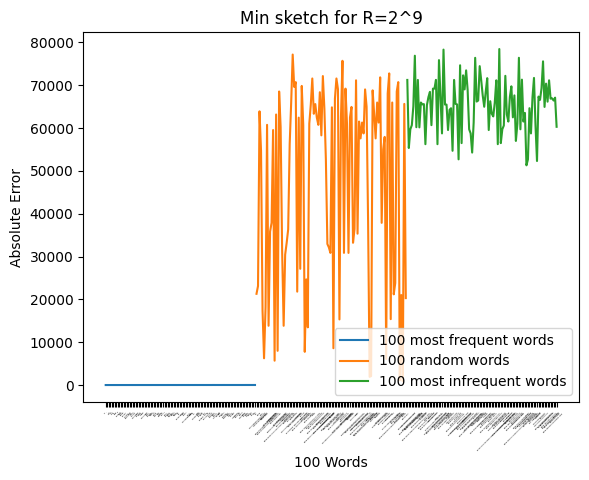

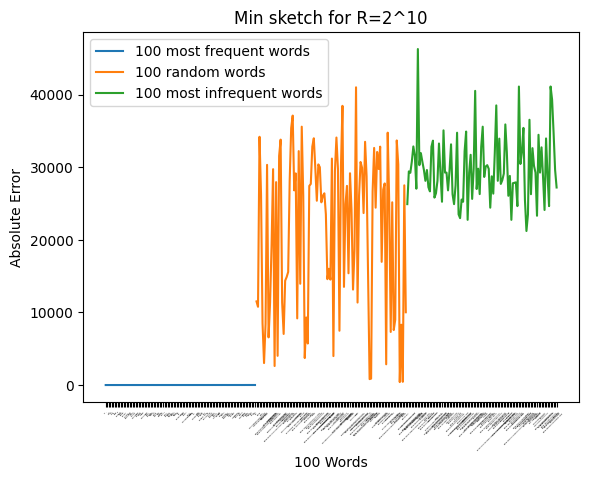

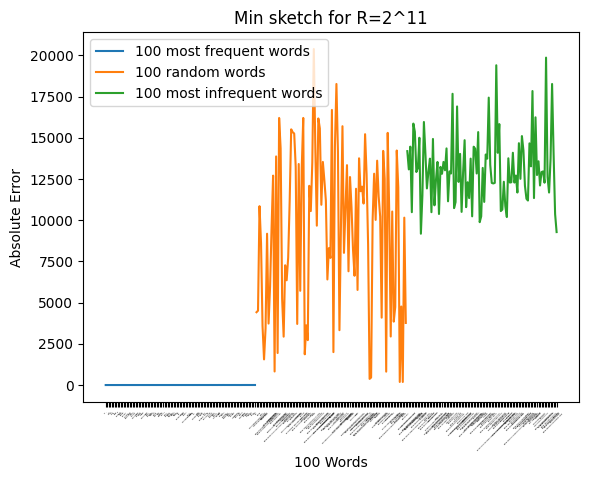

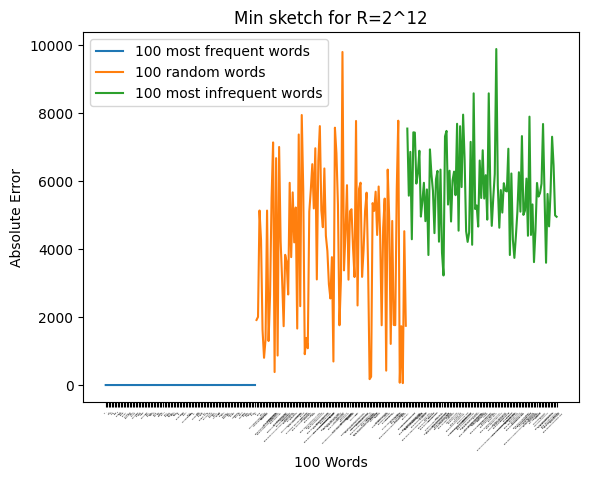

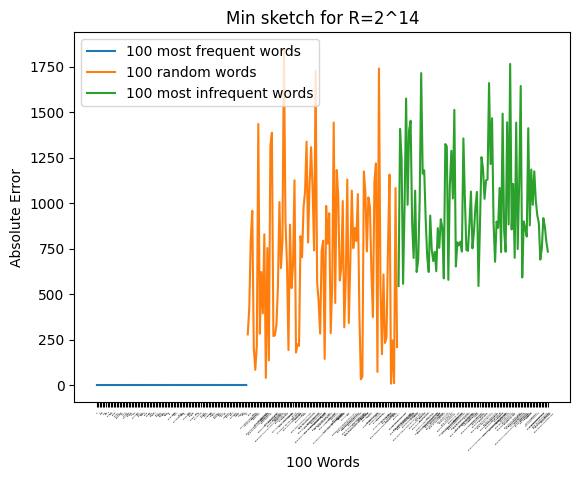

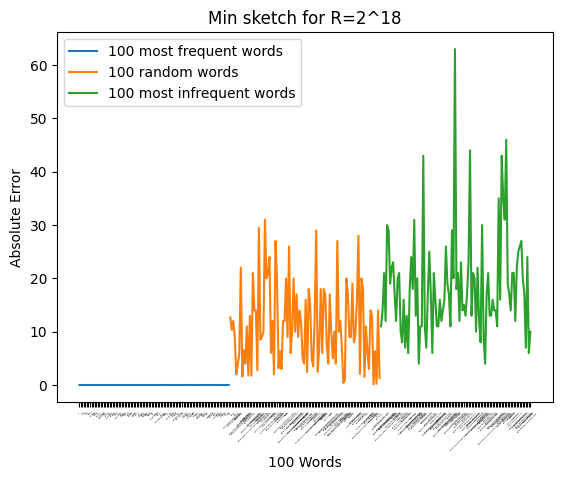

In [ ]:

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_9, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_9, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_9, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^9')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)


plt.show()
fig.savefig('Min_sketch_9.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_10, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_10, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_10, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^10')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)


plt.show()
fig.savefig('Min_sketch_10.jpg')


fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_11, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_11, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_11, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^11')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)


plt.show()
fig.savefig('Min_sketch_11.jpg')


fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_12, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_12, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_12, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^12')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)


plt.show()
fig.savefig('Min_sketch_12.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_14, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_14, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_14, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^14')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)


plt.show()
fig.savefig('Min_sketch_14.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_min_freq_18, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_min_rand_18, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_min_infreq_18, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Min sketch for R=2^18')

ax.legend()


plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Min_sketch_18.jpg')

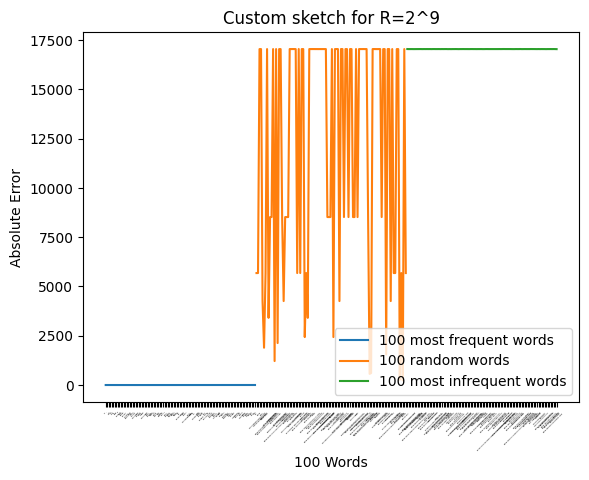

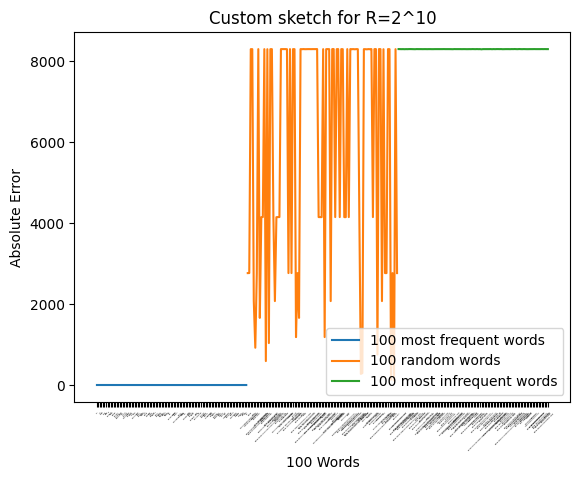

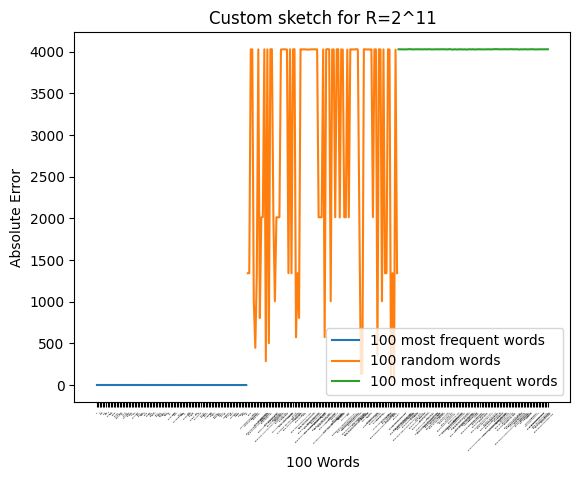

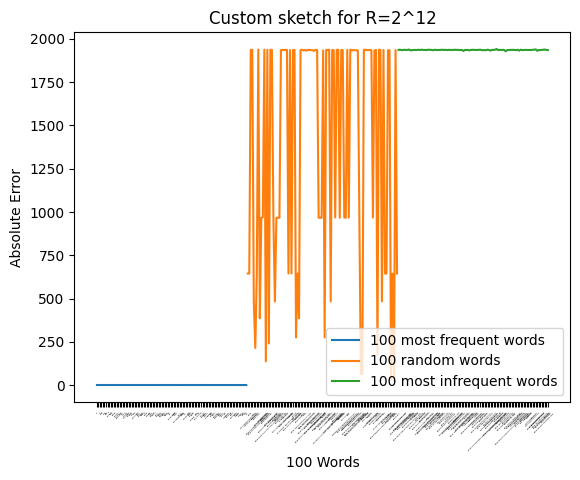

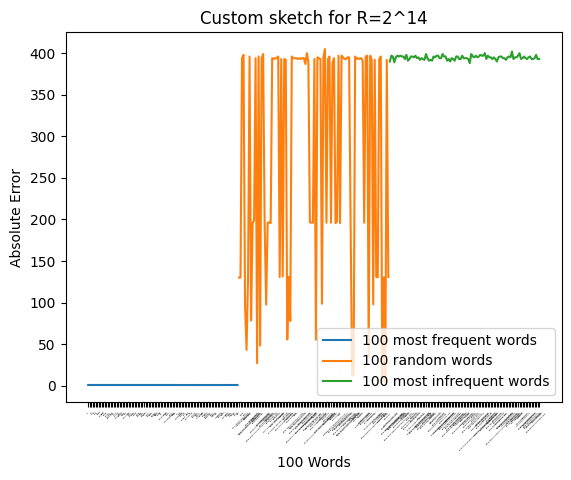

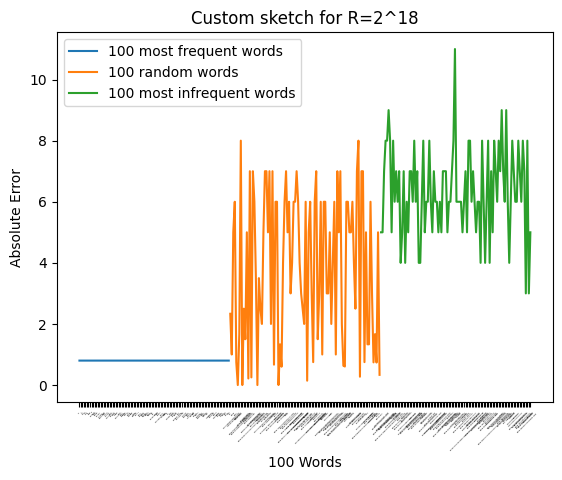

In [ ]:

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_9, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_9, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_9, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^9')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_9.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_10, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_10, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_10, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^10')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_10.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_11, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_11, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_11, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^11')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_11.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_12, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_12, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_12, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^12')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_12.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_14, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_14, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_14, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^14')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_14.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_cust_freq_18, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_cust_rand_18, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_cust_infreq_18, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Custom sketch for R=2^18')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Custom_sketch_18.jpg')

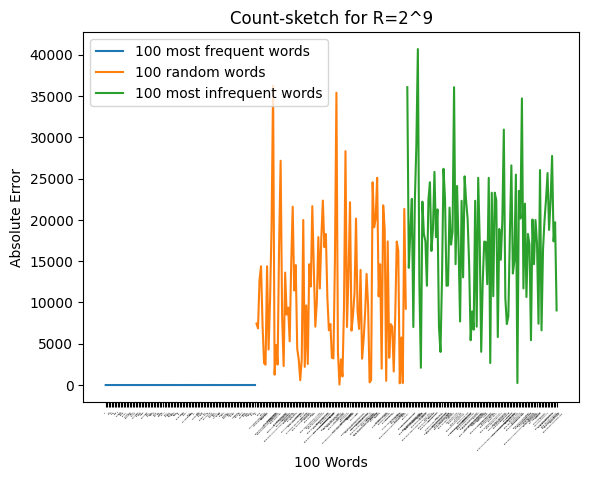

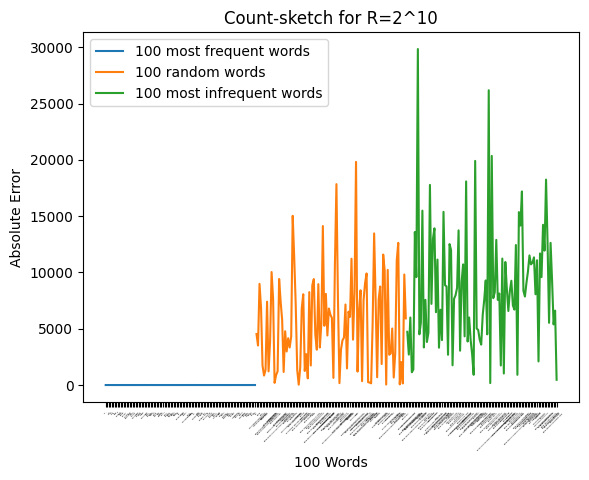

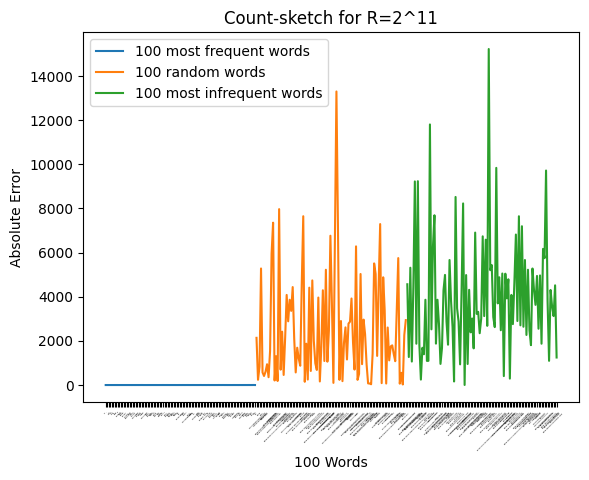

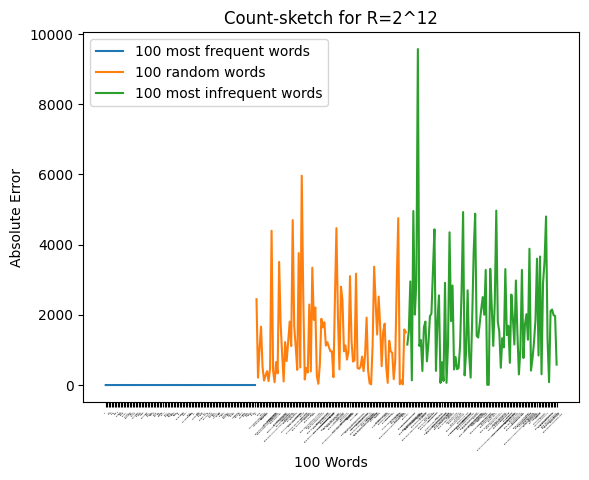

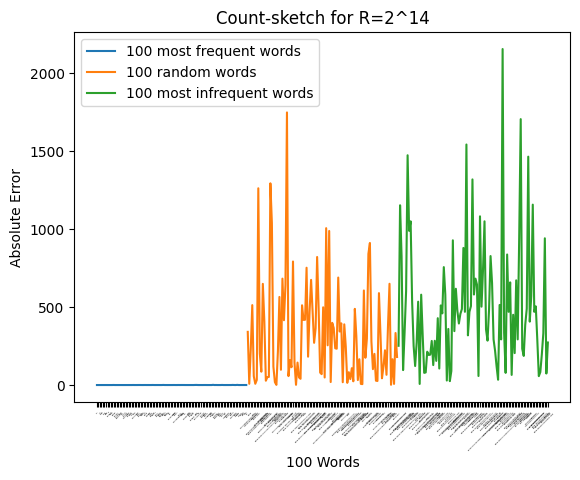

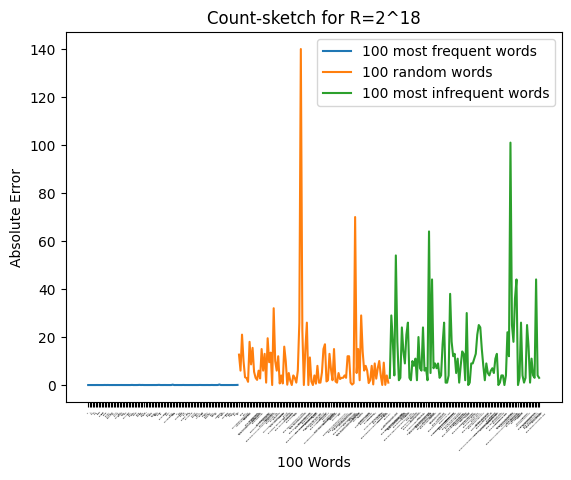

In [ ]:
fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_9, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_9, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_9, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^9')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_9.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_10, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_10, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_10, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^10')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_11.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_11, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_11, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_11, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^11')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_11.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_12, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_12, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_12, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^12')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_12.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_14, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_14, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_14, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^14')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_14.jpg')

fig, ax = plt.subplots()

ax.plot(freq_token, cost(pred_count_freq_18, np_freq_100), label='100 most frequent words')

ax.plot(rand_tokens, cost(pred_count_rand_18, np_rand), label='100 random words')

ax.plot(infreq_token, cost(pred_count_infreq_18, np_infreq_100), label='100 most infrequent words')

ax.set_xlabel('100 Words')
ax.set_ylabel('Absolute Error')
ax.set_title('Count-sketch for R=2^18')

ax.legend()

plt.xticks(rotation=45, fontsize=1.5)

plt.show()
fig.savefig('Count_sketch_18.jpg')


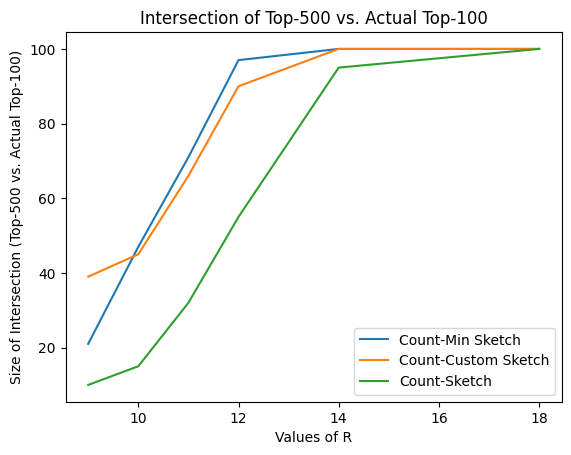

In [ ]:
set_min_9_t500 = set(min_sketch_filter_9.top_500)

set_min_10_t500 = set(min_sketch_filter_10.top_500)

set_min_11_t500 = set(min_sketch_filter_11.top_500)

set_min_12_t500 = set(min_sketch_filter_12.top_500)

set_min_14_t500 = set(min_sketch_filter_14.top_500)

set_min_18_t500 = set(min_sketch_filter_18.top_500)

set_cust_9_t500 = set(custom_sketch_filter_9.top_500)

set_cust_10_t500 = set(custom_sketch_filter_10.top_500)

set_cust_11_t500 = set(custom_sketch_filter_11.top_500)

set_cust_12_t500 = set(custom_sketch_filter_12.top_500)

set_cust_14_t500 = set(custom_sketch_filter_14.top_500)

set_cust_18_t500 = set(custom_sketch_filter_18.top_500)

set_count_9_t500 = set(count_sketch_filter_9.top_500)

set_count_10_t500 = set(count_sketch_filter_10.top_500)

set_count_11_t500 = set(count_sketch_filter_11.top_500)

set_count_12_t500 = set(count_sketch_filter_12.top_500)

set_count_14_t500 = set(count_sketch_filter_14.top_500)

set_count_18_t500 = set(count_sketch_filter_18.top_500)

set_top_100 = set(freq_token)

R_values = [9, 10, 11, 12, 14, 18]
count_min_intersection = [ len(list(set_min_9_t500.intersection(set_top_100))), len(list(set_min_10_t500.intersection(set_top_100))), len(list(set_min_11_t500.intersection(set_top_100))), len(list(set_min_12_t500.intersection(set_top_100))), len(list(set_min_14_t500.intersection(set_top_100))), len(list(set_min_18_t500.intersection(set_top_100)))]
count_custom_intersection = [ len(list(set_cust_9_t500.intersection(set_top_100))), len(list(set_cust_10_t500.intersection(set_top_100))), len(list(set_cust_11_t500.intersection(set_top_100))), len(list(set_cust_12_t500.intersection(set_top_100))), len(list(set_cust_14_t500.intersection(set_top_100))), len(list(set_cust_18_t500.intersection(set_top_100)))]
count_sketch_intersection = [ len(list(set_count_9_t500.intersection(set_top_100))), len(list(set_count_10_t500.intersection(set_top_100))), len(list(set_count_11_t500.intersection(set_top_100))), len(list(set_count_12_t500.intersection(set_top_100))),len(list(set_count_14_t500.intersection(set_top_100))), len(list(set_count_18_t500.intersection(set_top_100)))]

fig, ax = plt.subplots()

ax.plot(R_values, count_min_intersection, label='Count-Min Sketch')

ax.plot(R_values, count_custom_intersection, label='Count-Custom Sketch')

ax.plot(R_values, count_sketch_intersection, label='Count-Sketch')

ax.set_xlabel('Values of R')
ax.set_ylabel('Size of Intersection (Top-500 vs. Actual Top-100)')
ax.set_title('Intersection of Top-500 vs. Actual Top-100')

ax.legend()

plt.show()

fig.savefig('Intersection of Top-500 vs. Actual Top-100.jpg')


In [ ]:
print(np.mean(cost(pred_cust_freq_9, np_freq_100)), np.mean(cost(pred_min_freq_9, np_freq_100)), np.mean(cost(pred_count_freq_9, np_freq_100)))

0.8347126271608767 6.288612853379314 1.1718101223482102


In [ ]:
print(np.mean(cost(pred_cust_freq_10, np_freq_100)), np.mean(cost(pred_min_freq_10, np_freq_100)), np.mean(cost(pred_count_freq_10, np_freq_100)))

0.3200831357637777 2.968804793961189 0.47551337663433235


In [ ]:
print(np.mean(cost(pred_cust_freq_11, np_freq_100)), np.mean(cost(pred_min_freq_11, np_freq_100)), np.mean(cost(pred_count_freq_11, np_freq_100)))

0.5916670414770222 1.2985375581272667 0.3259128712921088


In [ ]:
print(np.mean(cost(pred_cust_freq_12, np_freq_100)), np.mean(cost(pred_min_freq_12, np_freq_100)), np.mean(cost(pred_count_freq_12, np_freq_100)))

0.7605434562911852 0.5666268342963775 0.24633018306177357


In [ ]:
print(np.mean(cost(pred_cust_freq_14, np_freq_100)), np.mean(cost(pred_min_freq_14, np_freq_100)), np.mean(cost(pred_count_freq_14, np_freq_100)))

0.7940710982762278 0.0978099485399114 0.10805642843950755


In [ ]:
print(np.mean(cost(pred_cust_freq_18, np_freq_100)), np.mean(cost(pred_min_freq_18, np_freq_100)), np.mean(cost(pred_count_freq_18, np_freq_100)))

0.8000319528389381 0.0017448467134084232 0.010618716719216596


In [ ]:
print(np.mean(cost(pred_cust_infreq_9, np_infreq_100)), np.mean(cost(pred_min_infreq_9, np_infreq_100)), np.mean(cost(pred_count_infreq_9, np_infreq_100)))

17048.14 65199.88 17481.99


In [ ]:
print(np.mean(cost(pred_cust_infreq_10, np_infreq_100)), np.mean(cost(pred_min_infreq_10, np_infreq_100)), np.mean(cost(pred_count_infreq_10, np_infreq_100)))

8293.86 29803.68 8670.25


In [ ]:
print(np.mean(cost(pred_cust_infreq_11, np_infreq_100)), np.mean(cost(pred_min_infreq_11, np_infreq_100)), np.mean(cost(pred_count_infreq_11, np_infreq_100)))

4029.5 13105.69 3991.07


In [ ]:
print(np.mean(cost(pred_cust_infreq_12, np_infreq_100)), np.mean(cost(pred_min_infreq_12, np_infreq_100)), np.mean(cost(pred_count_infreq_12, np_infreq_100)))

1935.59 5739.07 1903.28


In [ ]:
print(np.mean(cost(pred_cust_infreq_14, np_infreq_100)), np.mean(cost(pred_min_infreq_14, np_infreq_100)), np.mean(cost(pred_count_infreq_14, np_infreq_100)))

394.7 981.66 500.12


In [ ]:
print(np.mean(cost(pred_cust_infreq_18, np_infreq_100)), np.mean(cost(pred_min_infreq_18, np_infreq_100)), np.mean(cost(pred_count_infreq_18, np_infreq_100)))

6.34 18.51 13.16


In [ ]:
print(np.mean(cost(pred_cust_rand_9, np_rand)), np.mean(cost(pred_min_rand_9, np_rand)), np.mean(cost(pred_count_rand_9, np_rand)))

12191.909968149232 46592.521664909465 10912.73401646651


In [ ]:
print(np.mean(cost(pred_cust_rand_10, np_rand)), np.mean(cost(pred_min_rand_10, np_rand)), np.mean(cost(pred_count_rand_10, np_rand)))

5930.87230102872 21258.180242110044 5537.0908080808085


In [ ]:
print(np.mean(cost(pred_cust_rand_11, np_rand)), np.mean(cost(pred_min_rand_11, np_rand)), np.mean(cost(pred_count_rand_11, np_rand)))

2880.988598775776 9367.350629974864 2512.4716066424617


In [ ]:
print(np.mean(cost(pred_cust_rand_12, np_rand)), np.mean(cost(pred_min_rand_12, np_rand)), np.mean(cost(pred_count_rand_12, np_rand)))

1383.7171710189452 4052.7785413931942 1339.0372954079971


In [ ]:
print(np.mean(cost(pred_cust_rand_14, np_rand)), np.mean(cost(pred_min_rand_14, np_rand)), np.mean(cost(pred_count_rand_14, np_rand)))

281.587133535819 693.4268961620817 322.5241655378672


In [ ]:
print(np.mean(cost(pred_cust_rand_18, np_rand)), np.mean(cost(pred_min_rand_18, np_rand)), np.mean(cost(pred_count_rand_18, np_rand)))

3.851150595819951 11.18555258809291 9.053631382953965


In [ ]:
rand_cost_min = []
rand_cost_min.append(np.mean(cost(pred_min_rand_9, np_rand)))
rand_cost_min.append(np.mean(cost(pred_min_rand_10, np_rand)))
rand_cost_min.append(np.mean(cost(pred_min_rand_11, np_rand)))
rand_cost_min.append(np.mean(cost(pred_min_rand_12, np_rand)))
rand_cost_min.append(np.mean(cost(pred_min_rand_14, np_rand)))
rand_cost_min.append(np.mean(cost(pred_min_rand_18, np_rand)))

rand_cost_count = []
rand_cost_count.append(np.mean(cost(pred_count_rand_9, np_rand)))
rand_cost_count.append(np.mean(cost(pred_count_rand_10, np_rand)))
rand_cost_count.append(np.mean(cost(pred_count_rand_11, np_rand)))
rand_cost_count.append(np.mean(cost(pred_count_rand_12, np_rand)))
rand_cost_count.append(np.mean(cost(pred_count_rand_14, np_rand)))
rand_cost_count.append(np.mean(cost(pred_count_rand_18, np_rand)))

rand_cost_cust = []
rand_cost_cust.append(np.mean(cost(pred_cust_rand_9, np_rand)))
rand_cost_cust.append(np.mean(cost(pred_cust_rand_10, np_rand)))
rand_cost_cust.append(np.mean(cost(pred_cust_rand_11, np_rand)))
rand_cost_cust.append(np.mean(cost(pred_cust_rand_12, np_rand)))
rand_cost_cust.append(np.mean(cost(pred_cust_rand_14, np_rand)))
rand_cost_cust.append(np.mean(cost(pred_cust_rand_18, np_rand)))

In [ ]:
freq_cost_min = []
freq_cost_min.append(np.mean(cost(pred_min_rand_9, np_freq_100)))
freq_cost_min.append(np.mean(cost(pred_min_rand_10, np_freq_100)))
freq_cost_min.append(np.mean(cost(pred_min_rand_11, np_freq_100)))
freq_cost_min.append(np.mean(cost(pred_min_rand_12, np_freq_100)))
freq_cost_min.append(np.mean(cost(pred_min_rand_14, np_freq_100)))
freq_cost_min.append(np.mean(cost(pred_min_rand_18, np_freq_100)))

freq_cost_count = []
freq_cost_count.append(np.mean(cost(pred_count_rand_9, np_freq_100)))
freq_cost_count.append(np.mean(cost(pred_count_rand_10, np_freq_100)))
freq_cost_count.append(np.mean(cost(pred_count_rand_11, np_freq_100)))
freq_cost_count.append(np.mean(cost(pred_count_rand_12, np_freq_100)))
freq_cost_count.append(np.mean(cost(pred_count_rand_14, np_freq_100)))
freq_cost_count.append(np.mean(cost(pred_count_rand_18, np_freq_100)))

freq_cost_cust = []
freq_cost_cust.append(np.mean(cost(pred_cust_rand_9, np_freq_100)))
freq_cost_cust.append(np.mean(cost(pred_cust_rand_10, np_freq_100)))
freq_cost_cust.append(np.mean(cost(pred_cust_rand_11, np_freq_100)))
freq_cost_cust.append(np.mean(cost(pred_cust_rand_12, np_freq_100)))
freq_cost_cust.append(np.mean(cost(pred_cust_rand_14, np_freq_100)))
freq_cost_cust.append(np.mean(cost(pred_cust_rand_18, np_freq_100)))

In [ ]:
infreq_cost_min = []
infreq_cost_min.append(np.mean(cost(pred_min_rand_9, np_infreq_100)))
infreq_cost_min.append(np.mean(cost(pred_min_rand_10, np_infreq_100)))
infreq_cost_min.append(np.mean(cost(pred_min_rand_11, np_infreq_100)))
infreq_cost_min.append(np.mean(cost(pred_min_rand_12, np_infreq_100)))
infreq_cost_min.append(np.mean(cost(pred_min_rand_14, np_infreq_100)))
infreq_cost_min.append(np.mean(cost(pred_min_rand_18, np_infreq_100)))

infreq_cost_count = []
infreq_cost_count.append(np.mean(cost(pred_count_rand_9, np_infreq_100)))
infreq_cost_count.append(np.mean(cost(pred_count_rand_10, np_infreq_100)))
infreq_cost_count.append(np.mean(cost(pred_count_rand_11, np_infreq_100)))
infreq_cost_count.append(np.mean(cost(pred_count_rand_12, np_infreq_100)))
infreq_cost_count.append(np.mean(cost(pred_count_rand_14, np_infreq_100)))
infreq_cost_count.append(np.mean(cost(pred_count_rand_18, np_infreq_100)))

infreq_cost_cust = []
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_9, np_infreq_100)))
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_10, np_infreq_100)))
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_11, np_infreq_100)))
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_12, np_infreq_100)))
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_14, np_infreq_100)))
infreq_cost_cust.append(np.mean(cost(pred_cust_rand_18, np_infreq_100)))

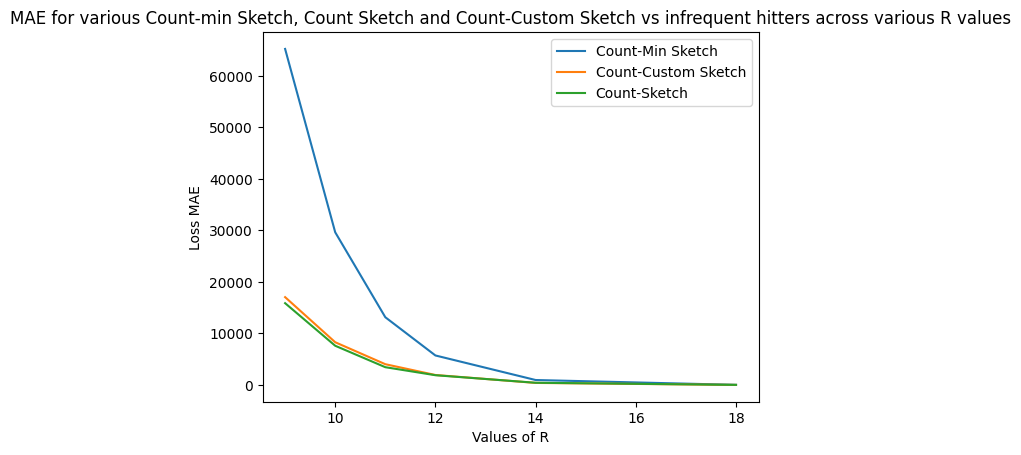

In [ ]:
fig, ax = plt.subplots()
R_values = [9, 10, 11, 12, 14, 18]
ax.plot(R_values, infreq_cost_min, label='Count-Min Sketch')

ax.plot(R_values, infreq_cost_cust, label='Count-Custom Sketch')

ax.plot(R_values, infreq_cost_count, label='Count-Sketch')

ax.set_xlabel('Values of R')
ax.set_ylabel('Loss MAE')
ax.set_title('MAE for various Count-min Sketch, Count Sketch and Count-Custom Sketch vs infrequent hitters across various R values')

ax.legend()

plt.show()

fig.savefig('MAE_infreq.jpg')


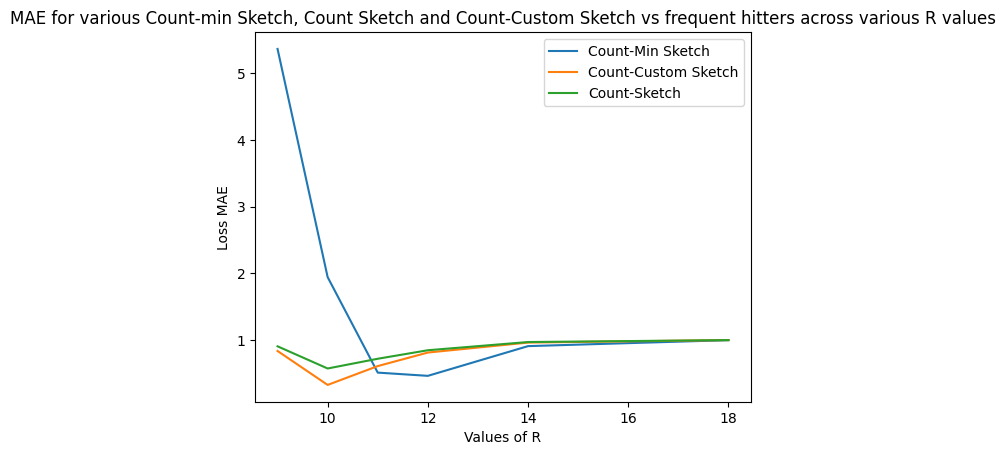

In [ ]:
fig, ax = plt.subplots()
R_values = [9, 10, 11, 12, 14, 18]
ax.plot(R_values, freq_cost_min, label='Count-Min Sketch')

ax.plot(R_values, freq_cost_cust, label='Count-Custom Sketch')

ax.plot(R_values, freq_cost_count, label='Count-Sketch')

ax.set_xlabel('Values of R')
ax.set_ylabel('Loss MAE')
ax.set_title('MAE for various Count-min Sketch, Count Sketch and Count-Custom Sketch vs frequent hitters across various R values')

ax.legend()

plt.show()

fig.savefig('MAE_freq.jpg')


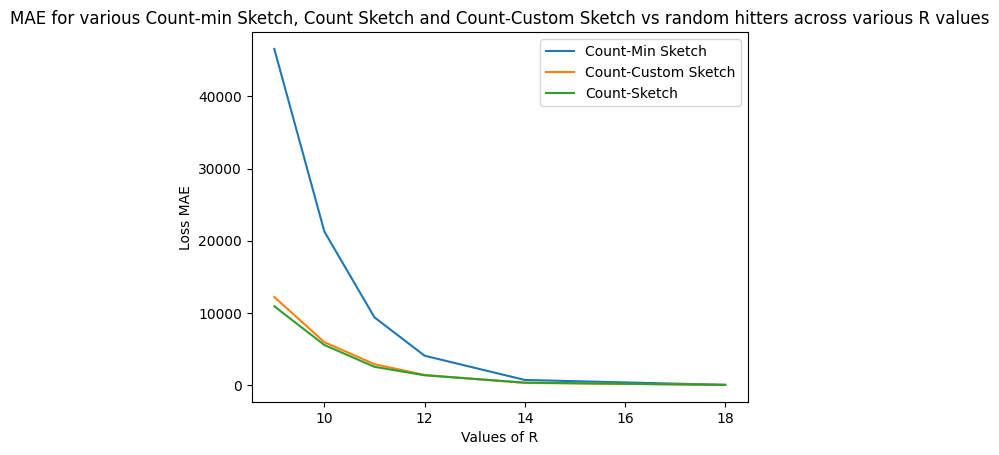

In [ ]:
fig, ax = plt.subplots()
R_values = [9, 10, 11, 12, 14, 18]
ax.plot(R_values, rand_cost_min, label='Count-Min Sketch')

ax.plot(R_values, rand_cost_cust, label='Count-Custom Sketch')

ax.plot(R_values, rand_cost_count, label='Count-Sketch')

ax.set_xlabel('Values of R')
ax.set_ylabel('Loss MAE')
ax.set_title('MAE for various Count-min Sketch, Count Sketch and Count-Custom Sketch vs random hitters across various R values')

ax.legend()

plt.show()

fig.savefig('MAE_freq.jpg')
